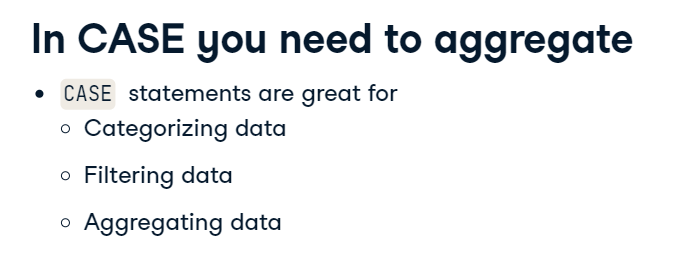
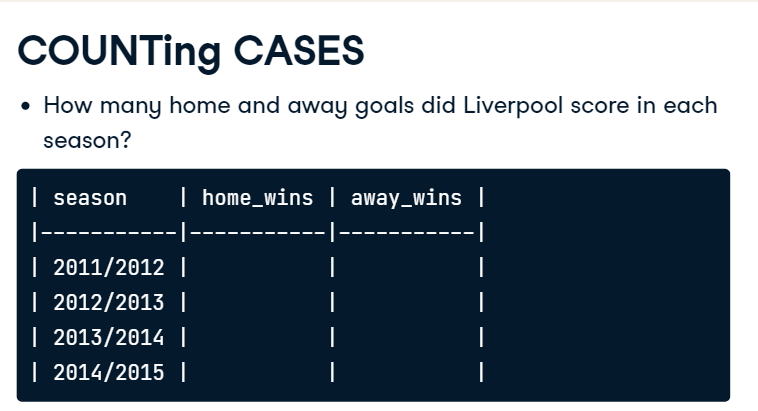
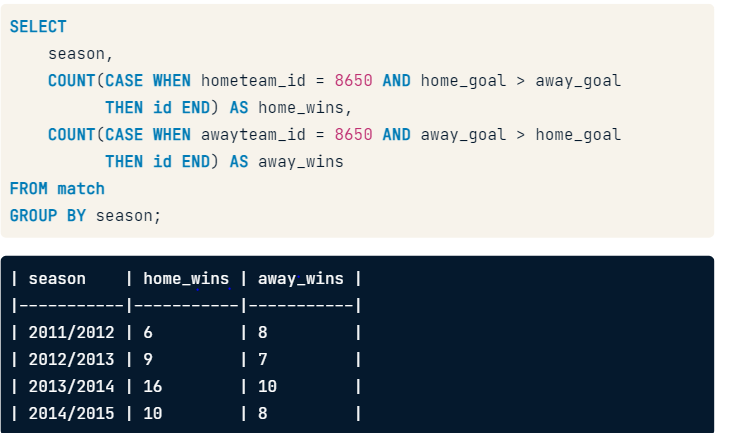
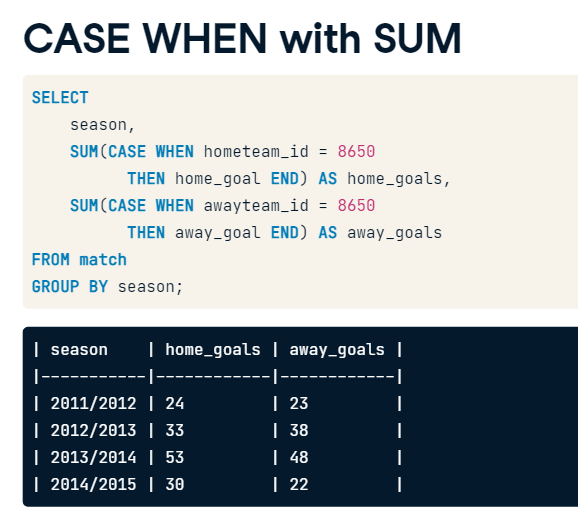
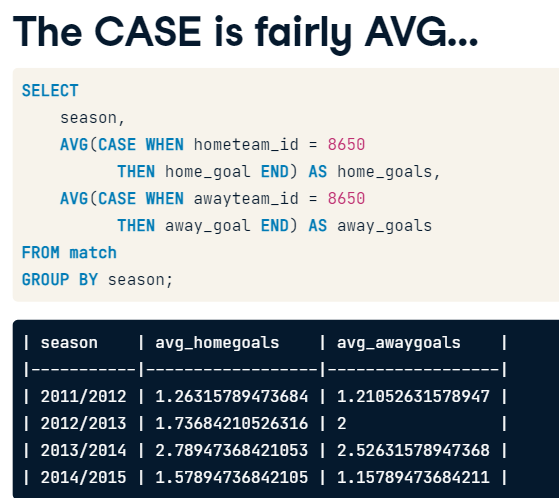
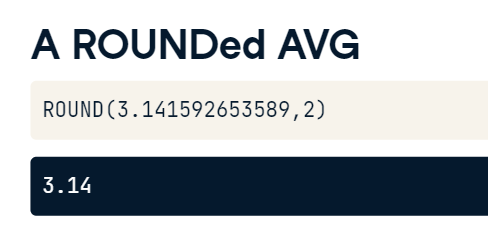
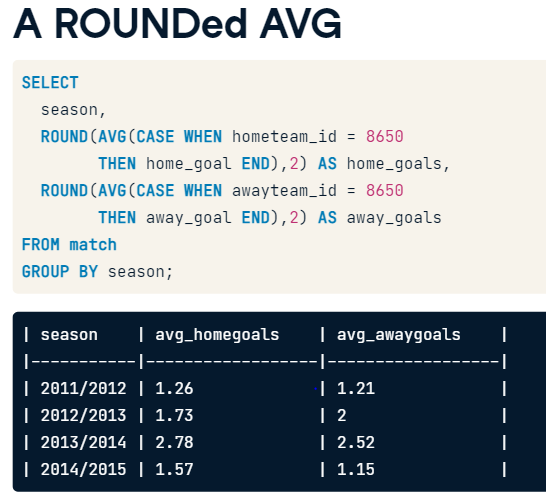
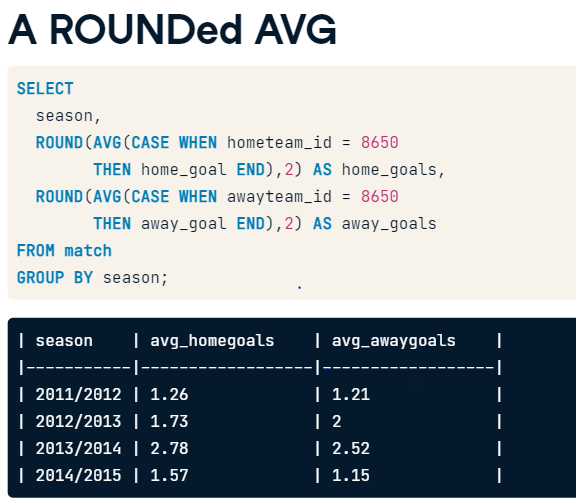
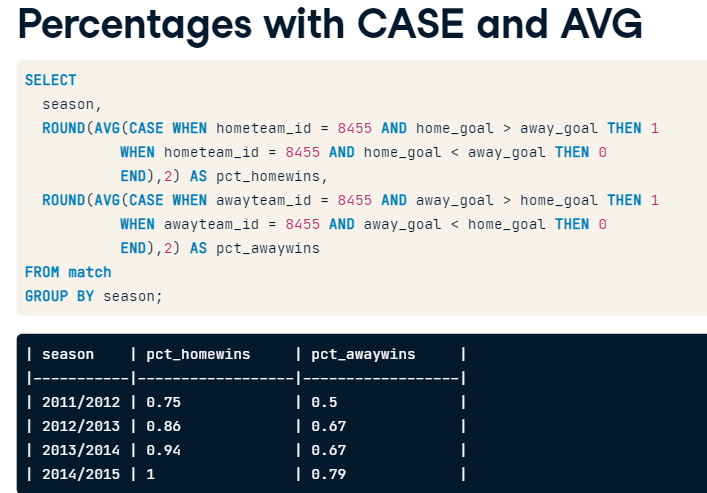
#### COUNT using CASE WHEN
Do the number of soccer matches played in a given European country differ across seasons? We will use the European Soccer Database to answer this question.

You will examine the number of matches played in 3 seasons within each country listed in the database. This is much easier to explore with each season's matches in separate columns. Using the country and unfiltered match table, you will count the number of matches played in each country during the 2012/2013, 2013/2014, and 2014/2015 match seasons.

- Create a CASE statement that identifies the id of matches played in the 2012/2013 season. Specify that you want ELSE values to be NULL.
- Wrap the CASE statement in a COUNT function and group the query by the country alias.

```sql
SELECT 
	c.name AS country,
    -- Count games from the 2012/2013 season
	COUNT(CASE WHEN m.season = '2012/2013' 
          	   THEN m.id ELSE NULL END) AS matches_2012_2013
FROM country AS c
LEFT JOIN match AS m
ON c.id = m.country_id
-- Group by country name alias
GROUP BY country;
```
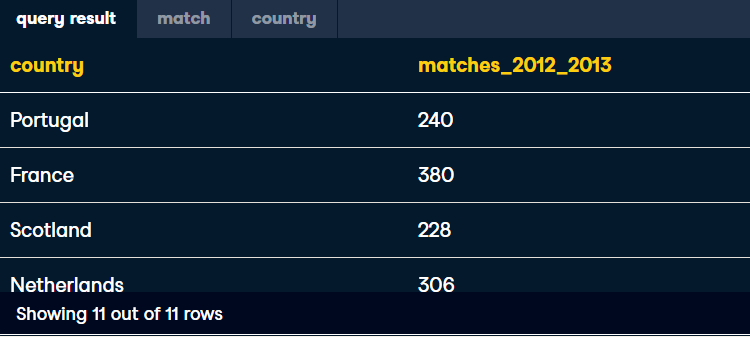

- Create 3 CASE WHEN statements counting the matches played in each country across the 3 seasons.
- END your CASE statement without an ELSE clause.

```sql
SELECT 
	c.name AS country,
    -- Count matches in each of the 3 seasons
	COUNT(CASE WHEN m.season = '2012/2013' THEN m.id END) AS matches_2012_2013,
	COUNT(CASE WHEN m.season = '2013/2014' THEN m.id END) AS matches_2013_2014,
	COUNT(CASE WHEN m.season = '2014/2015' THEN m.id END) AS matches_2014_2015
FROM country AS c
LEFT JOIN match AS m
ON c.id = m.country_id
-- Group by country name alias
GROUP BY country;
```
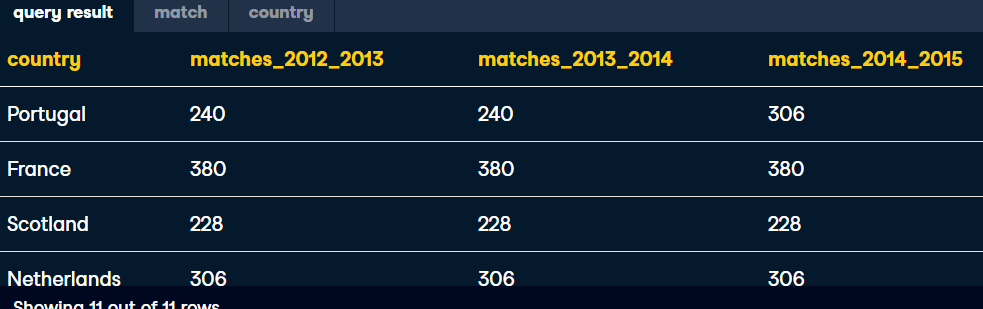

#### COUNT and CASE WHEN with multiple conditions
In R or Python, you have the ability to calculate a SUM of logical values (i.e., TRUE/FALSE) directly. In SQL, you have to convert these values into 1 and 0 before calculating a sum. This can be done using a CASE statement.

There's one key difference when using SUM to aggregate logical values compared to using COUNT in the previous exercise --

Your goal here is to use the country and match table to determine the total number of matches won by the home team in each country during the 2012/2013, 2013/2014, and 2014/2015 seasons.


- Create 3 CASE statements to "count" matches in the '2012/2013', '2013/2014', and '2014/2015' seasons, respectively.
- Have each CASE statement return a 1 for every match you want to include, and a 0 for every match to exclude.
- Wrap the CASE statement in a SUM to return the total matches played in each season.
- Group the query by the country name alias.

```sql
SELECT 
	c.name AS country,
    -- Sum the total records in each season where the home team won
	SUM(CASE WHEN m.season = '2012/2013' AND m.home_goal > m.away_goal 
        THEN 1 ELSE 0 END) AS matches_2012_2013,
	SUM(CASE WHEN m.season = '2013/2014' AND m.home_goal > m.away_goal 
        THEN 1 ELSE 0 END) AS matches_2013_2014,
	SUM(CASE WHEN m.season = '2014/2015' AND m.home_goal > m.away_goal 
        THEN 1 ELSE 0 END) AS matches_2014_2015
FROM country AS c
LEFT JOIN match AS m
ON c.id = m.country_id
-- Group by country name alias
GROUP BY country;
```
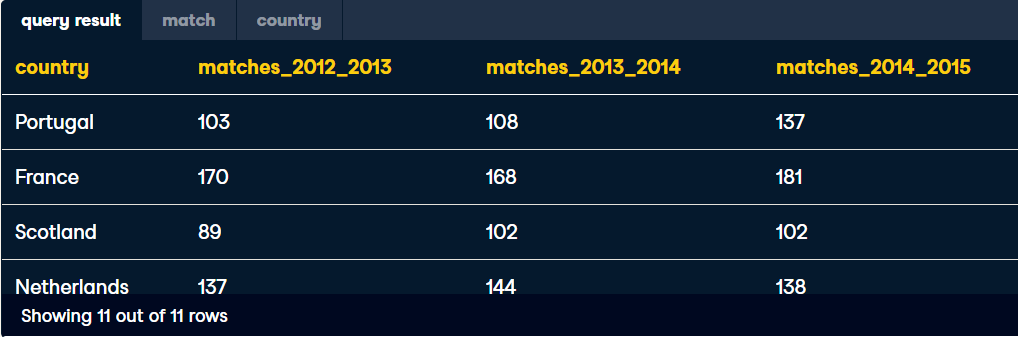

#### Calculating percent with CASE and AVG
CASE statements will return any value you specify in your THEN clause. This is an incredibly powerful tool for robust calculations and data manipulation when used in conjunction with an aggregate statement. One key task you can perform is using CASE inside an AVG function to calculate a percentage of information in your database.

Here's an example of how you set that up:
```sql
AVG(CASE WHEN condition_is_met THEN 1
         WHEN condition_is_not_met THEN 0 END)
```
With this approach, it's important to accurately specify which records count as 0, otherwise your calculations may not be correct!

Your task is to examine the number of wins, losses, and ties in each country. The matches table is filtered to include all matches from the 2013/2014 and 2014/2015 seasons.

- Create 3 CASE statements to COUNT the total number of home team wins, away team wins, and ties. This will allow you to examine the total number of records. You will convert this to an AVG in the next step.

```sql
SELECT 
	c.name AS country,
    -- Sum the home wins, away wins, and ties in each country
    COUNT(CASE WHEN m.home_goal > m.away_goal THEN m.id 
        END) AS home_wins,
    COUNT(CASE WHEN m.home_goal < m.away_goal THEN m.id 
        END) AS away_wins,
    COUNT(CASE WHEN m.home_goal = m.away_goal THEN m.id 
        END) AS ties
FROM country AS c
LEFT JOIN matches AS m
ON c.id = m.country_id
GROUP BY country;
```
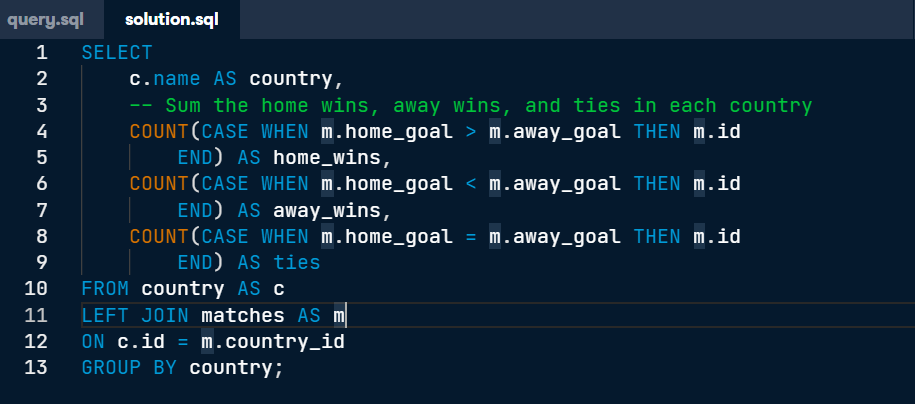

- Calculate the percentage of matches tied using a CASE statement inside AVG.
- Fill in the logical operators for each statement. Alias your columns as ties_2013_2014 and ties_2014_2015, respectively.

```sql
SELECT 
	c.name AS country,
    -- Calculate the percentage of tied games in each season
	AVG(CASE WHEN m.season= '2013/2014' AND m.home_goal = m.away_goal THEN 1
			 WHEN m.season= '2013/2014' AND m.home_goal != m.away_goal THEN 0
			 END) AS ties_2013_2014,
	AVG(CASE WHEN m.season= '2014/2015' AND m.home_goal = m.away_goal THEN 1
			 WHEN m.season= '2014/2015' AND m.home_goal != m.away_goal THEN 0
			 END) AS ties_2014_2015
FROM country AS c
LEFT JOIN matches AS m
ON c.id = m.country_id
GROUP BY country;
```
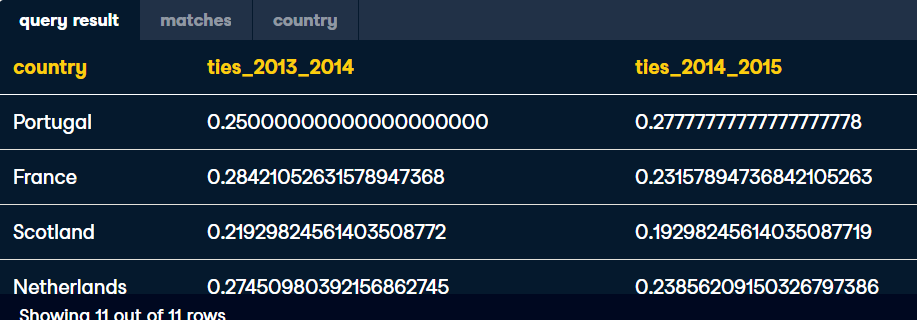

- The previous "ties" columns returned values with 14 decimal points, which is not easy to interpret. Use the ROUND function to round to 2 decimal points.
```sql
SELECT 
	c.name AS country,
    -- Round the percentage of tied games to 2 decimal points
	ROUND(AVG(CASE WHEN m.season='2013/2014' AND m.home_goal = m.away_goal THEN 1
			 WHEN m.season='2013/2014' AND m.home_goal != m.away_goal THEN 0
			 END),2) AS pct_ties_2013_2014,
	ROUND(AVG(CASE WHEN m.season='2014/2015' AND m.home_goal = m.away_goal THEN 1
			 WHEN m.season='2014/2015' AND m.home_goal != m.away_goal THEN 0
			 END),2) AS pct_ties_2014_2015
FROM country AS c
LEFT JOIN matches AS m
ON c.id = m.country_id
GROUP BY country;
```



